In [1]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
n1 = 5 # cantidad de ciudades
n2 = 10  # cantidad de viajes
n3 = 3  # distancia máxima
a = 0
distance = np.zeros([n1,n1])
moves = np.zeros([n2, 2])

In [3]:
while (np.linalg.matrix_rank(a)!=n1):
    a = np.random.randint(n3, size=(n1,n1))
    np.fill_diagonal(a,0)
    a = np.tril(a) + np.tril(a, -1).T
print("Matriz de rutas: \n{}".format(a))

Matriz de rutas: 
[[0 1 2 2 2]
 [1 0 1 1 0]
 [2 1 0 2 0]
 [2 1 2 0 2]
 [2 0 0 2 0]]


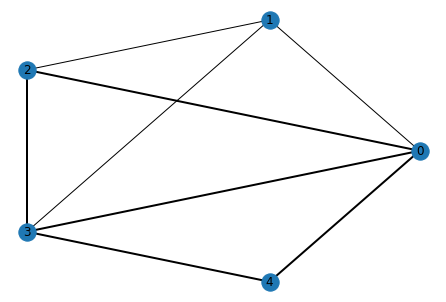

In [4]:
net1 = nx.from_numpy_matrix(copy.deepcopy(a))
net2 = nx.from_numpy_matrix(copy.deepcopy(a))
for e in net1.edges():
    net2[e[0]][e[1]]['color'] = 'black'

edge_weights_list = [net2[e[0]][e[1]]['weight'] for e in net2.edges()]
nx.draw_circular(net2, with_labels=True, width=edge_weights_list)
plt.show()

In [5]:
rng = np.random.default_rng()
for i in range(n2):
    moves[i,:] = rng.choice(n1, size=2, replace=False)
print("Matriz de movimientos: \n{}".format(moves))

Matriz de movimientos: 
[[0. 3.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 2.]
 [0. 3.]
 [0. 3.]
 [0. 4.]
 [3. 0.]]


In [6]:
colores = []
for i in range(n2):
    color = np.base_repr(np.random.choice(16777215), base=16)
    colores.append('#{:0>6}'.format(color))

In [7]:
all_edges = [e for e in net1.edges]
caminitos = []
for j in range(n2):
    p = nx.dijkstra_path(net1,int(moves[j,0]),int(moves[j,1]))
    cam = []
    for e in range(len(p)-1):
        cam.append(tuple(sorted((p[e], p[e+1]))))    
    caminitos.append(cam)
    print("{:0>3} - Para llegar desde {} hasta {} hay que hacer el siguiente camino: {}".format(j+1, moves[j,0],moves[j,1], p))

001 - Para llegar desde 0.0 hasta 3.0 hay que hacer el siguiente camino: [0, 3]
002 - Para llegar desde 0.0 hasta 1.0 hay que hacer el siguiente camino: [0, 1]
003 - Para llegar desde 0.0 hasta 1.0 hay que hacer el siguiente camino: [0, 1]
004 - Para llegar desde 0.0 hasta 1.0 hay que hacer el siguiente camino: [0, 1]
005 - Para llegar desde 0.0 hasta 1.0 hay que hacer el siguiente camino: [0, 1]
006 - Para llegar desde 1.0 hasta 2.0 hay que hacer el siguiente camino: [1, 2]
007 - Para llegar desde 0.0 hasta 3.0 hay que hacer el siguiente camino: [0, 3]
008 - Para llegar desde 0.0 hasta 3.0 hay que hacer el siguiente camino: [0, 3]
009 - Para llegar desde 0.0 hasta 4.0 hay que hacer el siguiente camino: [0, 4]
010 - Para llegar desde 3.0 hasta 0.0 hay que hacer el siguiente camino: [3, 0]


In [9]:
caminotes = np.zeros([len(net1.edges), n2])
for n_x, x in enumerate(net1.edges):
    for n_y1, y1 in enumerate(caminitos):
        for n_y2, y2 in enumerate(y1):
            if x==y2:
                caminotes[n_x, n_y1] = 1
                
caminotes_r = np.count_nonzero(caminotes, axis=1).reshape([-1, 1])
                
print("Todos los caminos disponibles: {}".format(all_edges))
print("Todos los caminos recorridos: {}".format(caminitos))
print("\nMatriz de recorridos: \n{}".format(caminotes))     
print("\nMatriz de recorridos repetidos: \n{}".format(caminotes_r))

caminotes_f1 = []
for x in range(caminotes.shape[0]):
    caminotes_f2 = []
    for y in range(caminotes.shape[1]):
        if caminotes[x,y]==1:
            caminotes_f2.append(y)
    caminotes_f1.append(caminotes_f2)

print("\nCaminos compartidos por rutas:", caminotes_f1)
for n_x, x in enumerate(caminotes_f1):
    print("\nLa ruta{} {} la comparten entre los recorridos:".format(n_x, all_edges[n_x]),end="")
    for n_y,y in enumerate(x):
        print(" {};".format(y),end="")

Todos los caminos disponibles: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (3, 4)]
Todos los caminos recorridos: [[(0, 3)], [(0, 1)], [(0, 1)], [(0, 1)], [(0, 1)], [(1, 2)], [(0, 3)], [(0, 3)], [(0, 4)], [(0, 3)]]

Matriz de recorridos: 
[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Matriz de recorridos repetidos: 
[[4]
 [0]
 [4]
 [1]
 [1]
 [0]
 [0]
 [0]]

Caminos compartidos por rutas: [[1, 2, 3, 4], [], [0, 6, 7, 9], [8], [5], [], [], []]

La ruta0 (0, 1) la comparten entre los recorridos: 1; 2; 3; 4;
La ruta1 (0, 2) la comparten entre los recorridos:
La ruta2 (0, 3) la comparten entre los recorridos: 0; 6; 7; 9;
La ruta3 (0, 4) la comparten entre los recorridos: 8;
La ruta4 (1, 2) la comparten entre los recorridos: 5;
La ruta5 (1, 3) la comparten entre l

In [19]:
for i in range(np.array(all_edges).shape[0]):
    a = all_edges[i]
    print("\nRuta:", a)
    for j in range(caminotes_r[i][0]):
        r = caminitos[caminotes_f1[i][j]]
        print("Para hacer el suguiente recorrido: {}. Debo pasar por {}.".format(moves[caminotes_f1[i][j]], r))


Ruta: (0, 1)
Para hacer el suguiente recorrido: [1. 2.]. Debo pasar por [(0, 1), (0, 2)].
Para hacer el suguiente recorrido: [1. 2.]. Debo pasar por [(0, 1), (0, 2)].
Para hacer el suguiente recorrido: [2. 1.]. Debo pasar por [(0, 2), (0, 1)].
Para hacer el suguiente recorrido: [1. 0.]. Debo pasar por [(0, 1)].

Ruta: (0, 2)
Para hacer el suguiente recorrido: [1. 2.]. Debo pasar por [(0, 1), (0, 2)].
Para hacer el suguiente recorrido: [1. 2.]. Debo pasar por [(0, 1), (0, 2)].
Para hacer el suguiente recorrido: [2. 0.]. Debo pasar por [(0, 2)].
Para hacer el suguiente recorrido: [3. 2.]. Debo pasar por [(0, 3), (0, 2)].
Para hacer el suguiente recorrido: [2. 1.]. Debo pasar por [(0, 2), (0, 1)].

Ruta: (0, 3)
Para hacer el suguiente recorrido: [3. 2.]. Debo pasar por [(0, 3), (0, 2)].
Para hacer el suguiente recorrido: [0. 3.]. Debo pasar por [(0, 3)].

Ruta: (1, 3)
Para hacer el suguiente recorrido: [1. 3.]. Debo pasar por [(1, 3)].
Para hacer el suguiente recorrido: [3. 1.]. Debo pas